# A  geographical comparation between  the  museums of Mexico city and Paris

The Unesco wants to make another office headquarters, they have little offices around the world but they are looking to build another one as big as the one in Paris. The top city candidate for this is Mexico City.
Why Mexico City? Mexico City is after Paris the city with most museums  also   Mexico  is in the top 10 countries with most World Heritage places. Mexico city is the perfect example of the mixture from the indigenus and colonizers cultures that are in cities all around Latin America.  Only having a big central office in Paris  has been limiteting for the Unesco to organized some activities like congress, festivals and specialized studies in Latin America.
The Unesco is doing a series of studies to help them decided that Mexico City is their best option.
They ask our company to make an study of how the  geographical distribution of the  museums in Paris and Mexico city to see how similar it is.

This project  was the final  project for obtaining the  certificate from the ibm-coursera course. The idea was to show everything that we learned in it . I invented the problem  and I  needeed to make  the data set from information taken of foursquare.  I love museums so that's how i got the idea and  i am very familiar with the museum's are of Mexico city and Paris so that's why i choose them.

# Data

For this project the data we will be using is the geographical coordinates of Pari's and Mexico city's museums from the API Foursquare. We choose an emblematic location in the Downton of each city for Paris the "Louvre Museum" and for Mexico the " Postal Building" and we look for all the museums that exist in a circle area of radius 10000. With this information we build the data frames for each city, the information in the data frames are: name, categories, address, crossStreet, lat, lng, labeledLatLngs, distance, postalCode , cc, city, state, country, formattedAddress, neighborhood and id. Because we are doing a big circle area to find the mueums it is posible that some museums that are not in "Mexico City" or " Paris" will appear in the data frame so we will eliminate by state, we are only interested in the ones that are in the state: "Distrito Federal" in the case of Mexico City an the ones in the state:" Paris" for Paris. With this dataframe we are going to be able to do the analysis that we are interested.

We need to make the observation that in Mexico City the cities correspond to the neighborhoods in other countries, this is importar for the following analysis.


# Libraries and Packages

In this part we will    import and install the mayority of the libraries we will use and  he Foursquare Id.

In [1]:
import requests
import pandas as pd 
import numpy as np
import random 


!pip install geopy
from geopy.geocoders import Nominatim 


from IPython.display import Image 
from IPython.core.display import HTML 
    

from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium 

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'VN0C4UKS3F1BVD04TOQ2LY51LJ1T2MVWRL5IGTWJSPOO320T' 
CLIENT_SECRET = '2TH51QVSNF4CZSXM4MCLYAVEZFW1NITV14AJ1ZQJ200AFZH4'
ACCESS_TOKEN = 'G40MKDZNNXPVJ4HPXY0MDHRQ3M4VNHDH0WVFBJUHVQK4QPEB' 
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VN0C4UKS3F1BVD04TOQ2LY51LJ1T2MVWRL5IGTWJSPOO320T
CLIENT_SECRET:2TH51QVSNF4CZSXM4MCLYAVEZFW1NITV14AJ1ZQJ200AFZH4


# Mexico

We will  start to do the data frame for Mexico. First we will get the coordinates from '1 Calle Tacuba, Ciudad de México, CDMX ' that is the adress for the "Postal Office Building" this is an emblematic building in the heart o the downton of Mexico city.

In [3]:
address = '1 Calle Tacuba, Ciudad de México, CDMX ' 

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

19.4355544 -99.1369788


Now we will make a query of a circular radius of 10000m in foursquare  for the word "museo" that is museum in spanish with center in the  "Postal Office Building".

In [4]:
search_query = 'museo'
radius = 10000
print(search_query + ' .... OK!')

museo .... OK!


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=VN0C4UKS3F1BVD04TOQ2LY51LJ1T2MVWRL5IGTWJSPOO320T&client_secret=2TH51QVSNF4CZSXM4MCLYAVEZFW1NITV14AJ1ZQJ200AFZH4&ll=19.4355544,-99.1369788&oauth_token=G40MKDZNNXPVJ4HPXY0MDHRQ3M4VNHDH0WVFBJUHVQK4QPEB&v=20180604&query=museo&radius=10000&limit=30'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '63ae3b31d85d45124eadca72'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4b058700f964a5209a7a22e3',
    'name': 'Museo Nacional de Arte (MUNAL)',
    'location': {'address': 'Tacuba 8',
     'crossStreet': 'Marconi',
     'lat': 19.43601775770991,
     'lng': -99.13960272035956,
     'labeledLatLngs': [{'label': 'display',
       'lat': 19.43601775770991,
       'lng': -99.13960272035956}],
     'distance': 280,
     'postalCode': '06010',
     'cc': 'MX',
     'city': 'Cuauhtemoc',
     'state': 'Distrito Federal',
     'country': 'México',
     'formattedAddress': ['Tacuba 8 (Marconi)',
      '06010 Cuauhtémoc, Distrito Federal']},
    'categories': [{'id': '4bf58dd8d48988d18f941735',
      'name': 'Art Museum',
      'pluralName': 'Art Museums',
      'shortName': 'Art Museum',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_art_',
       

Here we get a first dataframe for Mexico city but we are goig to make it better.

In [7]:

venues = results['response']['venues']


dataframe = json_normalize(venues)
dataframe.head()

C:\Users\Lucinda\AppData\Local\Temp\ipykernel_10564\2083590839.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b058700f964a5209a7a22e3,Museo Nacional de Arte (MUNAL),"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",v-1672362801,False,Tacuba 8,Marconi,19.436018,-99.139603,"[{'label': 'display', 'lat': 19.43601775770991...",280,06010,MX,Cuauhtemoc,Distrito Federal,México,"[Tacuba 8 (Marconi), 06010 Cuauhtémoc, Distrit...",32953266,NaN
1,4b058701f964a520dd7a22e3,"MIDE, Museo Interactivo de Economía","[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",v-1672362801,False,Tacuba 17,Bolívar,19.435470,-99.138386,"[{'label': 'display', 'lat': 19.43546951395513...",148,06000,MX,Cuauhtemoc,Distrito Federal,México,"[Tacuba 17 (Bolívar), 06000 Cuauhtémoc, Distri...",49935253,NaN
2,4b058701f964a520c47a22e3,Templo Mayor (Museo del Templo Mayor),"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",v-1672362801,False,Seminario 8,República de Guatemala,19.434839,-99.131642,"[{'label': 'display', 'lat': 19.43483927659205...",565,06060,MX,Ciudad de México,Distrito Federal,México,"[Seminario 8 (República de Guatemala), 06060 C...",NaN,NaN
3,4ba69b67f964a5206c6239e3,Museo Mexicano Del Diseño (MUMEDI),"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",v-1672362801,False,Francisco I. Madero 74,Entre Palma y Monte de Piedad,19.433322,-99.134482,"[{'label': 'display', 'lat': 19.43332246127097...",361,06000,MX,Cuauhtemoc,Distrito Federal,México,[Francisco I. Madero 74 (Entre Palma y Monte d...,NaN,NaN
4,4b058700f964a520a37a22e3,Museo Mural de Diego Rivera,"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",v-1672362801,False,Balderas y Colón,NaN,19.436201,-99.147107,"[{'label': 'display', 'lat': 19.43620079664887...",1065,06040,MX,Cuauhtemoc,Distrito Federal,México,"[Balderas y Colón, 06040 Cuauhtémoc, Distrito ...",NaN,NaN


This is going to give us a better version  of the data frame but we have some states with NaN that we need to eliminate.

In [8]:

filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Museo Nacional de Arte (MUNAL),Art Museum,Tacuba 8,Marconi,19.436018,-99.139603,"[{'label': 'display', 'lat': 19.43601775770991...",280,06010,MX,Cuauhtemoc,Distrito Federal,México,"[Tacuba 8 (Marconi), 06010 Cuauhtémoc, Distrit...",NaN,4b058700f964a5209a7a22e3
1,"MIDE, Museo Interactivo de Economía",Museum,Tacuba 17,Bolívar,19.435470,-99.138386,"[{'label': 'display', 'lat': 19.43546951395513...",148,06000,MX,Cuauhtemoc,Distrito Federal,México,"[Tacuba 17 (Bolívar), 06000 Cuauhtémoc, Distri...",NaN,4b058701f964a520dd7a22e3
2,Templo Mayor (Museo del Templo Mayor),History Museum,Seminario 8,República de Guatemala,19.434839,-99.131642,"[{'label': 'display', 'lat': 19.43483927659205...",565,06060,MX,Ciudad de México,Distrito Federal,México,"[Seminario 8 (República de Guatemala), 06060 C...",NaN,4b058701f964a520c47a22e3
3,Museo Mexicano Del Diseño (MUMEDI),Museum,Francisco I. Madero 74,Entre Palma y Monte de Piedad,19.433322,-99.134482,"[{'label': 'display', 'lat': 19.43332246127097...",361,06000,MX,Cuauhtemoc,Distrito Federal,México,[Francisco I. Madero 74 (Entre Palma y Monte d...,NaN,4ba69b67f964a5206c6239e3
4,Museo Mural de Diego Rivera,Art Museum,Balderas y Colón,NaN,19.436201,-99.147107,"[{'label': 'display', 'lat': 19.43620079664887...",1065,06040,MX,Cuauhtemoc,Distrito Federal,México,"[Balderas y Colón, 06040 Cuauhtémoc, Distrito ...",NaN,4b058700f964a520a37a22e3
5,Museo Manuel Tolsá,History Museum,En Frente Museo De Artes Mundiales,NaN,19.435973,-99.139300,"[{'label': 'display', 'lat': 19.43597285285461...",248,06000,MX,Ciudad de México,Distrito Federal,México,"[En Frente Museo De Artes Mundiales, 06000 Ciu...",NaN,4f25c244e4b067a32827f059
6,Museo Memoria y Tolerancia,Museum,Plaza Juárez,Av. Juárez,19.434214,-99.144207,"[{'label': 'display', 'lat': 19.43421447796603...",773,NaN,MX,Cuauhtemoc,Distrito Federal,México,"[Plaza Juárez (Av. Juárez), Cuauhtémoc, Distri...",NaN,4d4f05e323a76dcb904f66dc
7,Museo Franz Mayer,History Museum,Hidalgo 45,Esq. con Valerio Trujano,19.437235,-99.143507,"[{'label': 'display', 'lat': 19.43723463588988...",710,06300,MX,Cuauhtemoc,Distrito Federal,México,"[Hidalgo 45 (Esq. con Valerio Trujano), 06300 ...",NaN,4b058700f964a520997a22e3
8,Museo Nacional de las Culturas,History Museum,Moneda 13,Carmen,19.433382,-99.130355,"[{'label': 'display', 'lat': 19.43338157326819...",736,06060,MX,Cuauhtemoc,Distrito Federal,México,"[Moneda 13 (Carmen), 06060 Cuauhtémoc, Distrit...",NaN,4cad0e4cf47ea1431fce9621
9,Museo de Arte Popular,Art Museum,Revillagigedo 11,Independencia,19.433680,-99.146209,"[{'label': 'display', 'lat': 19.43368021884058...",991,06050,MX,Cuauhtemoc,Distrito Federal,México,"[Revillagigedo 11 (Independencia), 06050 Cuauh...",NaN,4b684e6ef964a520d0702be3


This is the final dataframe an we would name it df.

In [9]:
df=dataframe_filtered[dataframe_filtered['city'].notna()]

In [10]:
df 

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Museo Nacional de Arte (MUNAL),Art Museum,Tacuba 8,Marconi,19.436018,-99.139603,"[{'label': 'display', 'lat': 19.43601775770991...",280,06010,MX,Cuauhtemoc,Distrito Federal,México,"[Tacuba 8 (Marconi), 06010 Cuauhtémoc, Distrit...",NaN,4b058700f964a5209a7a22e3
1,"MIDE, Museo Interactivo de Economía",Museum,Tacuba 17,Bolívar,19.435470,-99.138386,"[{'label': 'display', 'lat': 19.43546951395513...",148,06000,MX,Cuauhtemoc,Distrito Federal,México,"[Tacuba 17 (Bolívar), 06000 Cuauhtémoc, Distri...",NaN,4b058701f964a520dd7a22e3
2,Templo Mayor (Museo del Templo Mayor),History Museum,Seminario 8,República de Guatemala,19.434839,-99.131642,"[{'label': 'display', 'lat': 19.43483927659205...",565,06060,MX,Ciudad de México,Distrito Federal,México,"[Seminario 8 (República de Guatemala), 06060 C...",NaN,4b058701f964a520c47a22e3
3,Museo Mexicano Del Diseño (MUMEDI),Museum,Francisco I. Madero 74,Entre Palma y Monte de Piedad,19.433322,-99.134482,"[{'label': 'display', 'lat': 19.43332246127097...",361,06000,MX,Cuauhtemoc,Distrito Federal,México,[Francisco I. Madero 74 (Entre Palma y Monte d...,NaN,4ba69b67f964a5206c6239e3
4,Museo Mural de Diego Rivera,Art Museum,Balderas y Colón,NaN,19.436201,-99.147107,"[{'label': 'display', 'lat': 19.43620079664887...",1065,06040,MX,Cuauhtemoc,Distrito Federal,México,"[Balderas y Colón, 06040 Cuauhtémoc, Distrito ...",NaN,4b058700f964a520a37a22e3
5,Museo Manuel Tolsá,History Museum,En Frente Museo De Artes Mundiales,NaN,19.435973,-99.139300,"[{'label': 'display', 'lat': 19.43597285285461...",248,06000,MX,Ciudad de México,Distrito Federal,México,"[En Frente Museo De Artes Mundiales, 06000 Ciu...",NaN,4f25c244e4b067a32827f059
6,Museo Memoria y Tolerancia,Museum,Plaza Juárez,Av. Juárez,19.434214,-99.144207,"[{'label': 'display', 'lat': 19.43421447796603...",773,NaN,MX,Cuauhtemoc,Distrito Federal,México,"[Plaza Juárez (Av. Juárez), Cuauhtémoc, Distri...",NaN,4d4f05e323a76dcb904f66dc
7,Museo Franz Mayer,History Museum,Hidalgo 45,Esq. con Valerio Trujano,19.437235,-99.143507,"[{'label': 'display', 'lat': 19.43723463588988...",710,06300,MX,Cuauhtemoc,Distrito Federal,México,"[Hidalgo 45 (Esq. con Valerio Trujano), 06300 ...",NaN,4b058700f964a520997a22e3
8,Museo Nacional de las Culturas,History Museum,Moneda 13,Carmen,19.433382,-99.130355,"[{'label': 'display', 'lat': 19.43338157326819...",736,06060,MX,Cuauhtemoc,Distrito Federal,México,"[Moneda 13 (Carmen), 06060 Cuauhtémoc, Distrit...",NaN,4cad0e4cf47ea1431fce9621
9,Museo de Arte Popular,Art Museum,Revillagigedo 11,Independencia,19.433680,-99.146209,"[{'label': 'display', 'lat': 19.43368021884058...",991,06050,MX,Cuauhtemoc,Distrito Federal,México,"[Revillagigedo 11 (Independencia), 06050 Cuauh...",NaN,4b684e6ef964a520d0702be3


# Analizing the museums data

Mexico's Downton city has 30 museums and here we have them by name and a map with the geographical location of each of them, the blue point correspond to the museums and the red point correspods to the  "Postal Office Building".  

In [11]:
df.shape

(29, 16)

In [12]:

df.name

0                        Museo Nacional de Arte (MUNAL)
1                   MIDE, Museo Interactivo de Economía
2                 Templo Mayor (Museo del Templo Mayor)
3                    Museo Mexicano Del Diseño (MUMEDI)
4                           Museo Mural de Diego Rivera
5                                    Museo Manuel Tolsá
6                            Museo Memoria y Tolerancia
7                                     Museo Franz Mayer
8                        Museo Nacional de las Culturas
9                                 Museo de Arte Popular
10                               Museo De La Caricatura
11                              Museo de la Cancilleria
12                  MUTEM Museo del Tequila y el Mezcal
13                                                Museo
14    Museo de Arte de la Secretaría de Hacienda y C...
15                                Museo Banco de México
16                                    Museo de Medicina
17                       Museo Archivo de la Fot

In the next cell we will locate the museums in the map with blue and the red point will only be use as a reference that's the point where el Edificio Postal is.

In [13]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

folium.CircleMarker(
    [19.43543, -99.14119],
    radius=10,
    color='red',
    popup='',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)


venues_map

Now let's analayze the data more closely.

How many museums are for each category?

In [14]:
catname= df.groupby("categories")["name"].count()
catname

categories
Art Museum         8
Bus Station        1
History Museum     7
Museum            12
Science Museum     1
Name: name, dtype: int64

In [15]:
import matplotlib.pyplot as plot

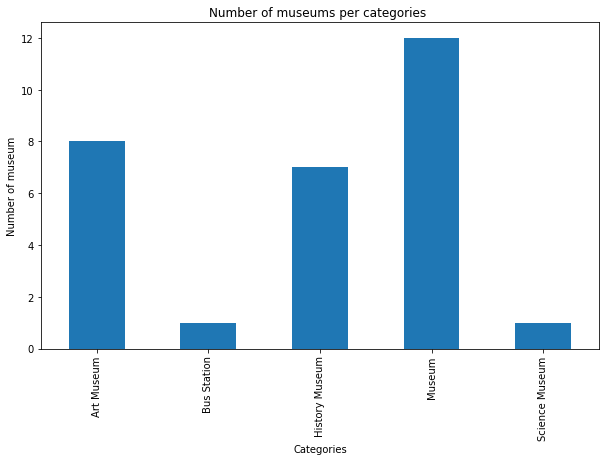

In [16]:
catname.plot(kind='bar', figsize=(10, 6))
plot.xlabel('Categories') 
plot.ylabel('Number of museum') 
plot.title('Number of museums per categories ') 

plot.show()

The category with most muesums is the category Museum and it has 14 museums.
The category with less muesums are the categories science museum  and  College History mueseum with only 1 


How many museums are for each city? (We are taking eaxh district as a city)

In [17]:
citnam=df.groupby("city")["name"].count()


In [18]:
citnam

city
Centro de la Ciudad de México.     1
Ciudad de México                  12
Cuauhtemoc                        11
Distrito Federal                   1
Downtown                           3
Miguel Hidalgo                     1
Name: name, dtype: int64

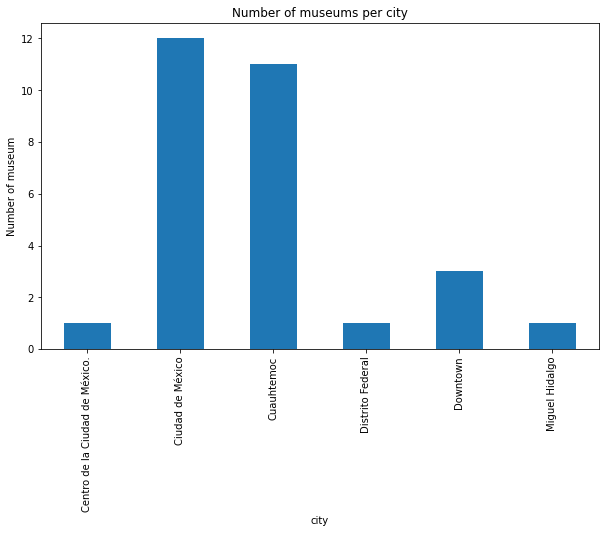

In [19]:
citnam.plot(kind='bar', figsize=(10, 6))
plot.xlabel('city') 
plot.ylabel('Number of museum') 
plot.title('Number of museums per city') 

plot.show()

The city with most museums is the Cuahtemoc with 10 and Del Cuahutémoc and Coyoacán only with one.

Here another interest facts that we can take for the  Mexico's data frame.

Which museum is the fartest from the Postal Building? 
Which museum is the closest from the Postal Building? 

In [20]:
column = df["distance"]

cmax=column.max()
cmin=column.min()

print('The maximum distance is', cmax, )
print('The minimum distance is', cmin)


The maximum distance is 7106
The minimum distance is 148


Now we are going to do  geographical  four clusters to know how the Museums distribute in each city. We will use Kmeans to achieve this and then we will plot them in a map. This will help us to have a visual idea of how the mexico's downton museums are distribute. 

In [39]:


from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors

In [40]:
dt_mex = df.drop(['name','categories','address','crossStreet','labeledLatLngs','distance','postalCode','cc','city','state','country','formattedAddress','neighborhood','id'],1)
dt_mex 

C:\Users\Lucinda\AppData\Local\Temp\ipykernel_10564\2728106527.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dt_mex = df.drop(['name','categories','address','crossStreet','labeledLatLngs','distance','postalCode','cc','city','state','country','formattedAddress','neighborhood','id'],1)


,lat,lng
0,19.436018,-99.139603
1,19.435470,-99.138386
2,19.434839,-99.131642
3,19.433322,-99.134482
4,19.436201,-99.147107
5,19.435973,-99.139300
6,19.434214,-99.144207
7,19.437235,-99.143507
8,19.433382,-99.130355
9,19.433680,-99.146209


In [41]:
kclusters = 4

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dt_mex)
kmeans.labels_[0:10] 


array([0, 0, 0, 0, 3, 0, 3, 3, 0, 3])

In [42]:
df.insert(0, 'Cluster Labels3', kmeans.labels_)

In [43]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(df['lat'], df['lng'], df['name'], df['Cluster Labels3']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters
       

## Paris

We will start to do the data frame for Paris. First we will get the coordinates from ' 'Rue de Rivoli, 75001 Paris, France'that is the adress for the "Louvre Museum".

In [44]:
address1 = 'Rue de Rivoli, 75001 Paris, France'

geolocator1 = Nominatim(user_agent="foursquare_agent")
location1 = geolocator1.geocode(address1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print(latitude1, longitude1)

48.8596121 2.3447985


In [45]:
search_query1 = 'Musée'
radius1 = 10000
print(search_query1 + ' .... OK!')

Musée .... OK!


In [46]:
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1,ACCESS_TOKEN, VERSION, search_query1, radius1, LIMIT)
url1

'https://api.foursquare.com/v2/venues/search?client_id=VN0C4UKS3F1BVD04TOQ2LY51LJ1T2MVWRL5IGTWJSPOO320T&client_secret=2TH51QVSNF4CZSXM4MCLYAVEZFW1NITV14AJ1ZQJ200AFZH4&ll=48.8596121,2.3447985&oauth_token=G40MKDZNNXPVJ4HPXY0MDHRQ3M4VNHDH0WVFBJUHVQK4QPEB&v=20180604&query=Musée&radius=10000&limit=30'

In [47]:
results1 = requests.get(url1).json()
results1

{'meta': {'code': 200, 'requestId': '63ae3ce06732d75a9e9a497c'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4adcda10f964a520af3521e3',
    'name': 'The Louvre (Musée du Louvre)',
    'location': {'address': 'Rue de Rivoli',
     'crossStreet': 'Place du Carrousel',
     'lat': 48.86084691113991,
     'lng': 2.336440086364746,
     'labeledLatLngs': [{'label': 'display',
       'lat': 48.86084691113991,
       'lng': 2.336440086364746}],
     'distance': 627,
     'postalCode': '75001',
     'cc': 'FR',
     'neighborhood': 'Le Louvre',
     'city': 'Paris',
     'state': 'Île-de-France',
     'country': 'France',
     'formattedAddress': ['Rue de Rivoli (Place du Carrousel)',
      '75001 Paris',
      'France']},
    'categories': [{'id': '4bf58dd8d48988d18f941735',
      'name': 'Art Museum',
      'pluralName': 'Art Museums',
      'shortName': 'Art Museum',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categor

Here is our first dat frame but we will filter it to make it better.

In [48]:

venues1 = results1['response']['venues']


dataframe1 = json_normalize(venues1)
dataframe1.head()

C:\Users\Lucinda\AppData\Local\Temp\ipykernel_10564\4159342628.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dataframe1 = json_normalize(venues1)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,4adcda10f964a520af3521e3,The Louvre (Musée du Louvre),"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",v-1672363232,False,Rue de Rivoli,Place du Carrousel,48.860847,2.336440,"[{'label': 'display', 'lat': 48.86084691113991...",627,75001,FR,Le Louvre,Paris,Île-de-France,France,"[Rue de Rivoli (Place du Carrousel), 75001 Par...",NaN
1,4adcda0af964a520623421e3,Pompidou Centre – National Museum of Modern Ar...,"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",v-1672363232,False,Place Georges Pompidou,Rue Beaubourg,48.860730,2.351660,"[{'label': 'display', 'lat': 48.86072970727395...",517,75004,FR,NaN,Paris,Île-de-France,France,"[Place Georges Pompidou (Rue Beaubourg), 75004...",NaN
2,5b6dae07e727c40024de8391,Pavillon de l'Horloge - Musée du Louvre,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",v-1672363232,False,Musée du Louvre,NaN,48.860485,2.337500,"[{'label': 'display', 'lat': 48.860485, 'lng':...",543,75001,FR,NaN,Paris,Île-de-France,France,"[Musée du Louvre, 75001 Paris, France]",NaN
3,4adcda10f964a5208b3521e3,Orsay Museum (Musée d'Orsay),"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",v-1672363232,False,1 rue de la Légion d'Honneur,Quai Anatole France,48.859993,2.326387,"[{'label': 'display', 'lat': 48.85999283813253...",1349,75007,FR,NaN,Paris,Île-de-France,France,[1 rue de la Légion d'Honneur (Quai Anatole Fr...,NaN
4,4adcda0ef964a520333521e3,"Métro Palais Royal – Musée du Louvre [1,7]","[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",v-1672363232,False,Place du Palais Royal,Place Colette,48.862604,2.336558,"[{'label': 'display', 'lat': 48.86260442048401...",689,75001,FR,NaN,Paris,Île-de-France,France,"[Place du Palais Royal (Place Colette), 75001 ...",NaN


This is our final data frame

In [49]:

filtered_columns1 = ['name', 'categories'] + [col for col in dataframe1.columns if col.startswith('location')] + ['id']
dataframe_filtered1 = dataframe1.loc[:, filtered_columns1]


def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)


dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]

dataframe_filtered1

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,id
0,The Louvre (Musée du Louvre),Art Museum,Rue de Rivoli,Place du Carrousel,48.860847,2.336440,"[{'label': 'display', 'lat': 48.86084691113991...",627,75001,FR,Le Louvre,Paris,Île-de-France,France,"[Rue de Rivoli (Place du Carrousel), 75001 Par...",4adcda10f964a520af3521e3
1,Pompidou Centre – National Museum of Modern Ar...,Art Museum,Place Georges Pompidou,Rue Beaubourg,48.860730,2.351660,"[{'label': 'display', 'lat': 48.86072970727395...",517,75004,FR,NaN,Paris,Île-de-France,France,"[Place Georges Pompidou (Rue Beaubourg), 75004...",4adcda0af964a520623421e3
2,Pavillon de l'Horloge - Musée du Louvre,Museum,Musée du Louvre,NaN,48.860485,2.337500,"[{'label': 'display', 'lat': 48.860485, 'lng':...",543,75001,FR,NaN,Paris,Île-de-France,France,"[Musée du Louvre, 75001 Paris, France]",5b6dae07e727c40024de8391
3,Orsay Museum (Musée d'Orsay),Art Museum,1 rue de la Légion d'Honneur,Quai Anatole France,48.859993,2.326387,"[{'label': 'display', 'lat': 48.85999283813253...",1349,75007,FR,NaN,Paris,Île-de-France,France,[1 rue de la Légion d'Honneur (Quai Anatole Fr...,4adcda10f964a5208b3521e3
4,"Métro Palais Royal – Musée du Louvre [1,7]",Metro Station,Place du Palais Royal,Place Colette,48.862604,2.336558,"[{'label': 'display', 'lat': 48.86260442048401...",689,75001,FR,NaN,Paris,Île-de-France,France,"[Place du Palais Royal (Place Colette), 75001 ...",4adcda0ef964a520333521e3
5,Librairie-Boutique du Musée du Louvre,Souvenir Shop,Allée du Grand Louvre,Musée du Louvre,48.860473,2.335173,"[{'label': 'display', 'lat': 48.860473, 'lng':...",711,75001,FR,NaN,Paris,Île-de-France,France,"[Allée du Grand Louvre (Musée du Louvre), 7500...",5d10ad48a4e311002fb771a4
6,Musée de l'Orangerie,Art Museum,Jardin des Tuileries,Place de la Concorde,48.863790,2.322664,"[{'label': 'display', 'lat': 48.86379017505446...",1686,75001,FR,Tuileries,Paris,Île-de-France,France,"[Jardin des Tuileries (Place de la Concorde), ...",4adcda10f964a520983521e3
7,Le Restaurant du Musée d'Orsay,French Restaurant,1 rue de la Légion d'Honneur,NaN,48.860300,2.325392,"[{'label': 'display', 'lat': 48.86029986248957...",1423,75007,FR,NaN,Paris,Île-de-France,France,"[1 rue de la Légion d'Honneur, 75007 Paris, Fr...",4cbb05054352a1cd0d4396f5
8,Musée du 11 Conti,Museum,11 quai de Conti,NaN,48.856833,2.339058,"[{'label': 'display', 'lat': 48.85683338028305...",521,75006,FR,NaN,Paris,Île-de-France,France,"[11 quai de Conti, 75006 Paris, France]",5abd0d073fcee827975e2fd7
9,Musée des Arts Décoratifs,Art Museum,107 rue de Rivoli,NaN,48.863077,2.333393,"[{'label': 'display', 'lat': 48.86307731406747...",920,75001,FR,"Louvre, Paris",Paris,Île-de-France,France,"[107 rue de Rivoli, 75001 Paris, France]",4cd5555fa5b34688a1248d50


In [50]:
df1=dataframe_filtered1

In [51]:
df1.shape

(30, 16)

# Analazyng the museum Data

Paris's Downton city has 30 museums and here we have them by name and a map with the geographical location of each of them, the blue point correspond to the museums and the red point correspods to the "Louvre museum".


In [52]:
df1.name

0                          The Louvre (Musée du Louvre)
1     Pompidou Centre – National Museum of Modern Ar...
2               Pavillon de l'Horloge - Musée du Louvre
3                          Orsay Museum (Musée d'Orsay)
4            Métro Palais Royal – Musée du Louvre [1,7]
5                 Librairie-Boutique du Musée du Louvre
6                                  Musée de l'Orangerie
7                        Le Restaurant du Musée d'Orsay
8                                     Musée du 11 Conti
9                             Musée des Arts Décoratifs
10    Musée de Cluny - Musée National du Moyen-Âge (...
11                   Musée de la Chasse et de la Nature
12                                     Musée Carnavalet
13                                        Musée Picasso
14                            Musée des Arts et Métiers
15          Galerie de la Bibliothèque-musée de l’Opéra
16                Musée d'Art et d'Histoire du Judaïsme
17                      Musée National Eugène-De

In [53]:
venues_map1 = folium.Map(location=[latitude1, longitude1], zoom_start=13) 

folium.CircleMarker(
    [48.8615266,  2.3391476],
    radius1=10,
    color1='red',
    popup1='',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map1)


for lat, lng, label in zip(dataframe_filtered1.lat, dataframe_filtered1.lng, dataframe_filtered1.categories):
    folium.CircleMarker(
        [lat, lng],
        radiu1s=5,
        color1='blue',
        popup1=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map1)

# display map
venues_map1

Now let's analayze the data more closely.


How many museums are for each category?


In [54]:
catname1= df1.groupby("categories")["name"].count()
catname1

categories
Art Gallery           1
Art Museum           12
Auditorium            1
Bus Stop              1
French Restaurant     1
Historic Site         1
History Museum        3
Metro Station         1
Museum                6
Office                1
Souvenir Shop         1
Train Station         1
Name: name, dtype: int64

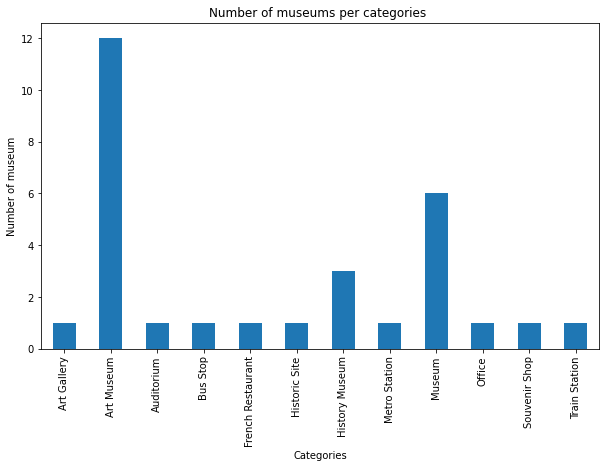

In [55]:
catname1.plot(kind='bar', figsize=(10, 6))
plot.xlabel('Categories') 
plot.ylabel('Number of museum') 
plot.title('Number of museums per categories ') 

plot.show()

Which museum is the fartest from the Louvre? Which museum is the closest from the louvre?

In [56]:
column1 = df1["distance"]

cmax1=column1.max()
cmin1=column1.min()

print('The maximum distance is', cmax1, )
print('The minimum distance is', cmin1)


The maximum distance is 2366
The minimum distance is 517


# K-clusters Paris

In [57]:
dt_paris = df1.drop(['name','categories','address','crossStreet','labeledLatLngs','distance','postalCode','cc','city','state','country','formattedAddress','neighborhood','id'],1)
dt_paris 

C:\Users\Lucinda\AppData\Local\Temp\ipykernel_10564\1394269829.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dt_paris = df1.drop(['name','categories','address','crossStreet','labeledLatLngs','distance','postalCode','cc','city','state','country','formattedAddress','neighborhood','id'],1)


,lat,lng
0,48.860847,2.336440
1,48.860730,2.351660
2,48.860485,2.337500
3,48.859993,2.326387
4,48.862604,2.336558
5,48.860473,2.335173
6,48.863790,2.322664
7,48.860300,2.325392
8,48.856833,2.339058
9,48.863077,2.333393


In [58]:
kclusters1 = 4

kmeans1 = KMeans(n_clusters=kclusters1, random_state=0).fit(dt_paris)
kmeans1.labels_[0:10] 


array([1, 0, 1, 3, 1, 1, 3, 3, 2, 1])

In [59]:
df1.insert(0, 'Cluster Labels4', kmeans1.labels_)

In [60]:

map_clusters1 = folium.Map(location=[latitude1, longitude1], zoom_start=11)


x1= np.arange(kclusters1)
ys1 = [i + x1 + (i*x1)**2 for i in range(kclusters1)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]
markers_colors = []
for lat, lon, poi, cluster in zip(df1['lat'], df1['lng'], df1['city'], df1['Cluster Labels4']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)



map_clusters1